<h4>Nama: Fairuza Luthfiana</h4><p></p>
<h4>NIM: F1D02310111</h4><p></p>
<h4>KELOMPOK 9</h4>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Berikut adalah beberapa library yang digunakan yaitu, import numpy as np, import matplotlib.pyplot as plt, dan import cv2 as cv. 

<h4>Load Gambar</h4>
Berikut kode yang digunakan untuk membaca gambar dari file "Assets/adudu.jpg". Selanjutnya gambar dibaca dengan menggunakan plt.imshow(adudu) gambar akan ditampilkan dilayar, kemudian terakhir,print(adudu.shape) digunakan untuk mencetak ukuran dari gambar tersebut.

(225, 225, 3)


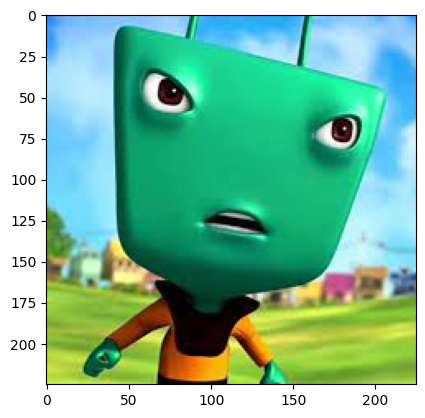

In [2]:
adudu = plt.imread("Assets/adudu.jpg")
plt.imshow(adudu)
print(adudu.shape)

<h4>Membuat gambar menjadi grayscale</h4>
Kode ini untuk mengubah gambar menjadi grayscale dengan menggunakan cv.cvtColor dari libarary cv2. Kemudian gambar ditampilkan kelayar dengan plt.imshow(adudu_gray, cmap = "gray") perlu penambahan cmap="gray" agar gambar ditampilkan dengan warna abu-abu dan terakhir print(adudu_gray.shape) mencetak ukuran gambar grayscale.

(225, 225)


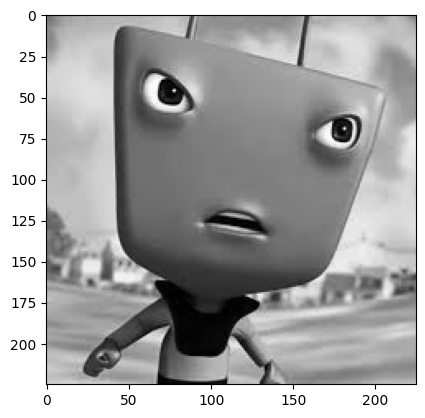

In [3]:
adudu_gray = cv.cvtColor(adudu, cv.COLOR_RGB2GRAY)
plt.imshow(adudu_gray, cmap = "gray")
print(adudu_gray.shape)

In [ ]:
kernel_3x3 = np.full((3,3), 1/9)
kernel_9x9 = np.full ((9,9), 1/81)
kernel_smooth = np.array([[1/10, 1/10, 1/10],
                         [1/10, 1/5, 1/10],
                         [1/10, 1/10, 1/10]])
kernel_tajam = np.array([[1/9, 1/9, 1/9],
                         [1/9, 8/9, 1/9],
                         [1/9, 1/9, 1/9]])

In [ ]:
def konvo(img, kernel):
    img_h, img_w = img.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h //2
    pad_w = kernel_w //2
    pad_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
    result = np.zeros_like(img)

    for i in range(img_h):
        for j in range (img_w):
            result [i, j] = np.sum(pad_img[i:i+kernel_h, j:j+kernel_w] * kernel)
    return result

In [ ]:
def op_modus (pot_img):
    count = {}
    for num in pot_img:
        if num in count:
            count[num] +=1
        else:
            count[num] = 1

    max_count = 0
    modus = None
    for num in count:
        if count[num] > max_count:
            max_count = count[num]
            modus = num
    return modus

In [ ]:
def op_median(pot_img):
    n = len(pot_img)
    sorted_pot = sorted(pot_img)
    if n % 2 == 0:
        median1 = sorted_pot[n//2]
        median2 = sorted_pot[n//2-1]
        median = (median1 + median2)/2
    else:
        median = sorted_pot[n//2]
    return median

In [6]:
def konvo_modmed(img, kernel, jenis):
    img_h, img_w = img.shape
    kernel_h, kernel_w = kernel.shape
    pad_h = kernel_h //2
    pad_w = kernel_w //2
    pad_img = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='edge')
    result = np.zeros_like(img)

    for i in range(img_h):
        for j in range (img_w):
            temp = np.zeros(len(kernel)*len(kernel))
            indeks = 0
            for k in range (kernel_h):
                for l in range (kernel_w):
                    temp[indeks] += pad_img[i+k, j+l]
                    indeks+=1
                    if(jenis=="modus"):
                        result[i, j] = op_modus(temp)
                    else:
                        result[i, j] = op_median(temp)
    return result

In [8]:
kernel3x3_empty = np.full((3,3), 0)
kernel9x9_empty = np.full((9,9), 0)

In [ ]:
mean3x3 = konvo(img, kernel_3x3)
mean9x9 = konvo(img, kernel_9x9)
sharp
